In [2]:
import torch
import torch.nn as nn
import numpy as np
import argparse
from dataset import get_dataset
import torch
import torch.nn as nn
from torch.autograd import Variable
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader

import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
class Namespace:
    def __init__(self, **kwargs):
        self.__dict__.update(kwargs)
        
args = Namespace(data_dir='./data/sort-of-clevr.pickle', batch_size=1, num_workers=20, no_img_norm=False)

In [13]:
train_set, val_set = get_dataset(args)

train-dataset loaded. 180000 rel+nonrel samples
val-dataset loaded. 10000/10000 rel/nonrel samples


In [25]:
nonrel_label_names = ["non_rel - shape", "non_rel - horizontal", "non_rel - vertical"]
rel_label_names = ["rel - shape-closet", "rel - shape-furthest", "rel - count"]
label_names = nonrel_label_names + rel_label_names
print(label_names)

train_qst_freq = np.zeros((6))
val_qst_freq   = np.zeros((6))

['non_rel - shape', 'non_rel - horizontal', 'non_rel - vertical', 'rel - shape-closet', 'rel - shape-furthest', 'rel - count']
[30162. 29876. 29962. 29925. 30249. 29826.]


In [34]:
def get_qst_freq(dataloader, qst_freq, phase):
    iteration = 1 if phase=="train" else 2
    
    for idx, data in enumerate(dataloader):
        for i in range(iteration):
            # load data
            if phase == "train":
                img = data[0]
                qst = data[1]
                ans = data[2]
            elif phase == "val":
                img = data[0][i]
                qst = data[1][i]
                ans = data[2][i]
            
            # get qst type
            main_type = 0 if qst[6] else 3 # 0=non-rel, 1=rel
            if qst[-3]:
                sub_type = 0
            elif qst[-2]:
                sub_type = 1
            elif qst[-1]:
                sub_type = 2
            qst_type = main_type + sub_type

            # update qst freq
            qst_freq[qst_type] += 1
    return qst_freq

train_qst_freq = get_qst_freq(train_set, train_qst_freq, "train")
val_qst_freq = get_qst_freq(val_set, val_qst_freq, "val")

tensor([0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1.])
tensor([0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1.])
tensor([1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.])
tensor([0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1.])
tensor([0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0.])
tensor([1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.])
tensor([0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.])
tensor([0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0.])
tensor([0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1.])
tensor([1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.])
tensor([0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0.])
tensor([0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.])
tensor([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0.])
tensor([0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0.])
tensor([0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0.])
tensor([0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.])
tensor([0., 0., 0., 0., 1., 0., 0., 1., 0., 0.

tensor([0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0.])
tensor([1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.])
tensor([0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1.])
tensor([0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.])
tensor([0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.])
tensor([0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1.])
tensor([1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.])
tensor([1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.])
tensor([0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.])
tensor([1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.])
tensor([0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0.])
tensor([0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1.])
tensor([0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.])
tensor([0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0.])
tensor([0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0.])
tensor([0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0.])
tensor([0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0.])
tensor([0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1.])
tensor([0., 0., 1., 0., 0., 0., 1., 0., 0., 0.

tensor([1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.])
tensor([0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0.])
tensor([0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.])
tensor([0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0.])
tensor([1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.])
tensor([1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.])
tensor([0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1.])
tensor([1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.])
tensor([0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1.])
tensor([0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1.])
tensor([0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0.])
tensor([0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1.])
tensor([1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.])
tensor([0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0.])
tensor([0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0.])
tensor([0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0.])
tensor([0., 0., 1., 0., 0., 0., 1., 0., 0., 1.

tensor([1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.])
tensor([0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.])
tensor([0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.])
tensor([0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1.])
tensor([0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0.])
tensor([1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.])
tensor([0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0.])
tensor([1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.])
tensor([0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1.])
tensor([0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.])
tensor([0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.])
tensor([0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0.])
tensor([0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0.])
tensor([0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.])
tensor([0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1.])
tensor([0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0.])
tensor([0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0.])
tensor([0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1.])
tensor([0., 0., 0., 0., 1., 0., 1., 0., 0., 0.

tensor([0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.])
tensor([0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1.])
tensor([0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.])
tensor([0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.])
tensor([1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.])
tensor([0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0.])
tensor([1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.])
tensor([1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.])
tensor([0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0.])
tensor([0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1.])
tensor([0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.])
tensor([0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1.])
tensor([0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1.])
tensor([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0.])
tensor([1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.])
tensor([1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.])
tensor([0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0.])
tensor([0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0., 0., 0., 1., 0., 1.

tensor([0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.])
tensor([0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1.])
tensor([0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.])
tensor([0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0.])
tensor([0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1.])
tensor([0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0.])
tensor([0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0.])
tensor([0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.])
tensor([0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.])
tensor([0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.])
tensor([0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1.])
tensor([1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.])
tensor([0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0.])
tensor([0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1.])
tensor([0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.])
tensor([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0.])
tensor([0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.])
tensor([0., 1., 0., 0., 0., 0., 1., 0., 1., 0.

tensor([0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0.])
tensor([0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0.])
tensor([0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0.])
tensor([0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0.])
tensor([0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.])
tensor([0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0.])
tensor([0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.])
tensor([0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.])
tensor([0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.])
tensor([0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0.])
tensor([1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.])
tensor([0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.])
tensor([0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0.])
tensor([0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0.])
tensor([0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0.])
tensor([0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0.])
tensor([0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1.])
tensor([0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1.])
tensor([0., 1., 0., 0., 0., 0., 1., 0., 0., 0.

tensor([0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0.])
tensor([1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.])
tensor([0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0.])
tensor([0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1.])
tensor([0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0.])
tensor([0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0.])
tensor([0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.])
tensor([0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0.])
tensor([0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.])
tensor([0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0.])
tensor([1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1.])
tensor([0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.])
tensor([1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.])
tensor([1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.])
tensor([0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.])
tensor([1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.])
tensor([0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1.])
tensor([0., 0., 0., 0., 1., 0., 1., 0., 0., 1.

tensor([1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.])
tensor([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0.])
tensor([0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0.])
tensor([0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0.])
tensor([0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0.])
tensor([0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0.])
tensor([0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.])
tensor([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0.])
tensor([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0.])
tensor([0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0.])
tensor([0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0.])
tensor([0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0.])
tensor([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0.])
tensor([0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0.])
tensor([1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.])
tensor([0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1.])
tensor([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0.])
tensor([1., 0., 0., 0., 0., 0., 0., 1., 1., 0.

tensor([1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.])
tensor([0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.])
tensor([0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0.])
tensor([0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1.])
tensor([0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0.])
tensor([0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1.])
tensor([0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0.])
tensor([0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1.])
tensor([0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1.])
tensor([0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1.])
tensor([0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1.])
tensor([0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0.])
tensor([0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.])
tensor([0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0.])
tensor([0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0.])
tensor([0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.])
tensor([0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0.])
tensor([0., 0., 0., 0., 0., 1., 1., 0., 1., 0.

tensor([0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0.])
tensor([0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0.])
tensor([0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0.])
tensor([1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.])
tensor([0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.])
tensor([0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.])
tensor([0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0.])
tensor([0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0.])
tensor([0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.])
tensor([0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0.])
tensor([0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1.])
tensor([0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1.])
tensor([0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0.])
tensor([1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.])
tensor([0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1.])
tensor([0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0.])
tensor([0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.])
tensor([0., 0., 0., 1., 0., 0., 1., 0., 0., 1.

tensor([0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.])
tensor([0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1.])
tensor([0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0.])
tensor([0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0.])
tensor([1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.])
tensor([0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0.])
tensor([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0.])
tensor([0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0.])
tensor([0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0.])
tensor([1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.])
tensor([0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.])
tensor([0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0.])
tensor([0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1.])
tensor([0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0.])
tensor([0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.])
tensor([0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0.])
tensor([0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1.])
tensor([1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.])
tensor([0., 0., 0., 0., 0., 1., 1., 0., 0., 1.

tensor([0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1.])
tensor([0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0.])
tensor([0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.])
tensor([0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0.])
tensor([0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.])
tensor([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0.])
tensor([0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0.])
tensor([0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1.])
tensor([0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.])
tensor([1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.])
tensor([0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1.])
tensor([0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.])
tensor([1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.])
tensor([0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.])
tensor([0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0.])
tensor([0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.])
tensor([1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.])
tensor([0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1.])
tensor([0., 0., 0., 1., 0., 0., 0., 1., 1., 0.

tensor([0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1.])
tensor([0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0.])
tensor([0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0.])
tensor([0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.])
tensor([0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1.])
tensor([0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.])
tensor([1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.])
tensor([0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.])
tensor([0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0.])
tensor([0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.])
tensor([0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0.])
tensor([0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0.])
tensor([0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1.])
tensor([0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.])
tensor([0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1.])
tensor([0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0.])
tensor([0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0.])
tensor([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0.])
tensor([0., 0., 0., 0., 0., 1., 0., 1., 1., 0.

tensor([0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0.])
tensor([0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0.])
tensor([0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.])
tensor([0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0.])
tensor([0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0.])
tensor([0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.])
tensor([1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.])
tensor([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0.])
tensor([0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1.])
tensor([0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1.])
tensor([0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1.])
tensor([0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1.])
tensor([0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0.])
tensor([1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.])
tensor([0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0.])
tensor([0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0.])
tensor([0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1.])
tensor([0., 0., 1., 0., 0., 0., 0., 1., 0., 1.

tensor([0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1.])
tensor([0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0.])
tensor([1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.])
tensor([0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0.])
tensor([1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.])
tensor([1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.])
tensor([0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1.])
tensor([0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0.])
tensor([0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0.])
tensor([0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0.])
tensor([1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.])
tensor([0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1.])
tensor([0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.])
tensor([0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.])
tensor([0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1.])
tensor([0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1.])
tensor([0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1.])
tensor([0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0.])
tensor([0., 0., 0., 1., 0., 0., 1., 0., 0., 0.

tensor([0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1.])
tensor([0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.])
tensor([0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1.])
tensor([0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1.])
tensor([0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1.])
tensor([0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0.])
tensor([0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0.])
tensor([0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.])
tensor([0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1.])
tensor([0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.])
tensor([0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1.])
tensor([0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.])
tensor([0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1.])
tensor([0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.])
tensor([0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1.])
tensor([0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0.])
tensor([1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.])
tensor([0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0.])
tensor([0., 0., 0., 1., 0., 0., 1., 0., 1., 0.

tensor([0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0.])
tensor([0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1.])
tensor([0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0.])
tensor([0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.])
tensor([0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.])
tensor([0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0.])
tensor([0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1.])
tensor([0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0.])
tensor([0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1.])
tensor([0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.])
tensor([0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.])
tensor([0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0.])
tensor([0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.])
tensor([0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.])
tensor([0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1.])
tensor([0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1.])
tensor([1., 0., 0., 0., 0., 0., 1., 0., 0., 1.

tensor([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0.])
tensor([0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1.])
tensor([0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.])
tensor([0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0.])
tensor([0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1.])
tensor([1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.])
tensor([1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.])
tensor([0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1.])
tensor([1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.])
tensor([0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.])
tensor([0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0.])
tensor([0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0.])
tensor([0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1.])
tensor([1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.])
tensor([0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0.])
tensor([0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0.])
tensor([0., 0., 1., 0., 0., 0., 1., 0., 0., 1.

tensor([0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0.])
tensor([1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.])
tensor([1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.])
tensor([0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.])
tensor([1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.])
tensor([0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1.])
tensor([1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.])
tensor([0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.])
tensor([0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1.])
tensor([0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0.])
tensor([0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1.])
tensor([0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0.])
tensor([0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0.])
tensor([0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0.])
tensor([1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.])
tensor([0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0.])
tensor([0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1.])
tensor([0., 0., 0., 0., 0., 1., 1., 0., 0., 1.

tensor([0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0.])
tensor([0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0.])
tensor([0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0.])
tensor([0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.])
tensor([0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0.])
tensor([1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.])
tensor([0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1.])
tensor([0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.])
tensor([0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1.])
tensor([0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0.])
tensor([0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.])
tensor([1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.])
tensor([1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.])
tensor([0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1.])
tensor([0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.])
tensor([0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0.])
tensor([0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1.])
tensor([0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.])
tensor([0., 0., 1., 0., 0., 0., 1., 0., 1., 0.

tensor([0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0.])
tensor([0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1.])
tensor([0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.])
tensor([0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0.])
tensor([0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0.])
tensor([0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.])
tensor([1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.])
tensor([1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.])
tensor([0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0.])
tensor([0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0.])
tensor([0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0.])
tensor([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0.])
tensor([1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.])
tensor([0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.])
tensor([0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0.])
tensor([0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0.])
tensor([1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.])
tensor([0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1.])
tensor([0., 1., 0., 0., 0., 0., 0., 1., 0., 0.

tensor([0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.])
tensor([0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1.])
tensor([0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0.])
tensor([0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.])
tensor([0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.])
tensor([0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0.])
tensor([1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.])
tensor([0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.])
tensor([0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.])
tensor([1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.])
tensor([0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1.])
tensor([0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.])
tensor([0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0.])
tensor([1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.])
tensor([0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0.])
tensor([0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.])
tensor([0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1.])
tensor([0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0., 0., 0., 1., 1., 0.

tensor([0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0.])
tensor([1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.])
tensor([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0.])
tensor([0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.])
tensor([1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.])
tensor([1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.])
tensor([0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1.])
tensor([0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.])
tensor([0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.])
tensor([0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1.])
tensor([0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.])
tensor([1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.])
tensor([1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.])
tensor([0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1.])
tensor([0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1.])
tensor([0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0.])
tensor([0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0.])
tensor([1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.])
tensor([0., 1., 0., 0., 0., 0., 1., 0., 1., 0.

tensor([1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.])
tensor([1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.])
tensor([0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0.])
tensor([0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0.])
tensor([0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.])
tensor([1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.])
tensor([0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0.])
tensor([0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.])
tensor([0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1.])
tensor([0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0.])
tensor([1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.])
tensor([0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0.])
tensor([0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0.])
tensor([0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0.])
tensor([0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.])
tensor([0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.])
tensor([0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.])
tensor([1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.])
tensor([0., 0., 0., 1., 0., 0., 1., 0., 0., 0.

tensor([1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.])
tensor([0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0.])
tensor([0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.])
tensor([0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0.])
tensor([0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0.])
tensor([0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1.])
tensor([0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.])
tensor([0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0.])
tensor([0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1.])
tensor([0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0.])
tensor([0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0.])
tensor([0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0.])
tensor([0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1.])
tensor([0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.])
tensor([1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.])
tensor([0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1.])
tensor([0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.])
tensor([0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0.])
tensor([0., 0., 0., 0., 0., 1., 1., 0., 0., 1.

tensor([0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.])
tensor([0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0.])
tensor([0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1.])
tensor([0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1.])
tensor([0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1.])
tensor([0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.])
tensor([0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1.])
tensor([0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1.])
tensor([0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0.])
tensor([0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1.])
tensor([1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.])
tensor([0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0.])
tensor([0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.])
tensor([0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.])
tensor([0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.])
tensor([0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0.])
tensor([0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0.])
tensor([1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.])
tensor([0., 1., 0., 0., 0., 0., 1., 0., 0., 1.

tensor([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0.])
tensor([0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0.])
tensor([1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.])
tensor([0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.])
tensor([0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0.])
tensor([0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.])
tensor([0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0.])
tensor([0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.])
tensor([0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0.])
tensor([0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1.])
tensor([0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1.])
tensor([1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.])
tensor([0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.])
tensor([0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0.])
tensor([0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.])
tensor([0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0.])
tensor([0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1.])
tensor([0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0.])
tensor([0., 0., 1., 0., 0., 0., 1., 0., 1., 0.

tensor([0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0.])
tensor([0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1.])
tensor([0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1.])
tensor([0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1.])
tensor([0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0.])
tensor([0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.])
tensor([0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0.])
tensor([0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0.])
tensor([0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1.])
tensor([1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.])
tensor([0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.])
tensor([0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0.])
tensor([0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1.])
tensor([0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0.])
tensor([0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0.])
tensor([0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1.])
tensor([0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0.])
tensor([0., 0., 1., 0., 0., 0., 1., 0., 0., 1.

tensor([0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1.])
tensor([0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0.])
tensor([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0.])
tensor([0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1.])
tensor([0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0.])
tensor([0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1.])
tensor([1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.])
tensor([1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.])
tensor([0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.])
tensor([0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1.])
tensor([0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.])
tensor([1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.])
tensor([1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.])
tensor([0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0.])
tensor([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0.])
tensor([0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.])
tensor([0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.])
tensor([0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1.])
tensor([0., 0., 0., 0., 1., 0., 1., 0., 0., 1.

tensor([0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.])
tensor([0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.])
tensor([0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0.])
tensor([0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.])
tensor([0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0.])
tensor([0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.])
tensor([0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.])
tensor([1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.])
tensor([0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0.])
tensor([0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0.])
tensor([0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.])
tensor([0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.])
tensor([0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0.])
tensor([0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0.])
tensor([0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1.])
tensor([0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.])
tensor([0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.])
tensor([1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.])
tensor([0., 0., 0., 0., 0., 1., 0., 1., 0., 1.

tensor([0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1.])
tensor([0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.])
tensor([0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1.])
tensor([1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.])
tensor([0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1.])
tensor([0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0.])
tensor([0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0.])
tensor([0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0.])
tensor([0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.])
tensor([0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0.])
tensor([0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0.])
tensor([0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0.])
tensor([0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1.])
tensor([0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1.])
tensor([0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.])
tensor([0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0.])
tensor([0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0.])
tensor([0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1.])
tensor([0., 0., 0., 1., 0., 0., 1., 0., 1., 0.

tensor([0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.])
tensor([1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.])
tensor([0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1.])
tensor([0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0.])
tensor([0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1.])
tensor([1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.])
tensor([0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0.])
tensor([0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.])
tensor([0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.])
tensor([1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.])
tensor([0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.])
tensor([0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0.])
tensor([0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.])
tensor([1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.])
tensor([0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.])
tensor([0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1.])
tensor([0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1.])
tensor([0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0.])
tensor([0., 0., 1., 0., 0., 0., 1., 0., 1., 0.

<BarContainer object of 6 artists>

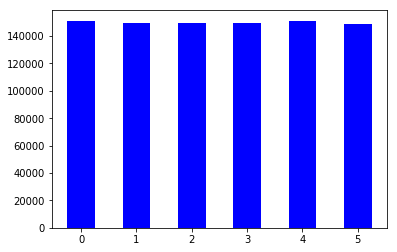

In [44]:
# plot balance of traininset
y = train_qst_freq
x = range(len(train_qst_freq))
plt.bar(x, y, width=0.5, color="b")

<BarContainer object of 6 artists>

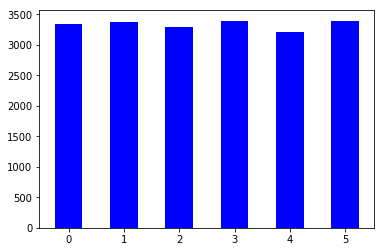

In [45]:
# plot balance of valset
y = val_qst_freq
x = range(len(val_qst_freq))
plt.bar(x, y, width=0.5, color="blue")